In [10]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv.csv')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')
df['date_added'] = df['date_added'].fillna('unknown')
df['rating'] = df['rating'].fillna('unknown')
df['duration'] = df['duration'].fillna('unknown')

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
df.shape

(8807, 12)

In [21]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Movies dominate the platform, indicating that Netflix focuses more on film-based content than episodic programming.

Text(0, 0.5, 'count')

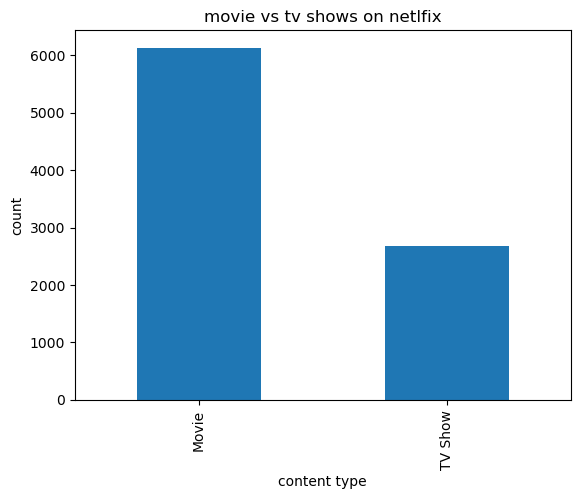

In [23]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')

plt.title('movie vs tv shows on netlfix')
plt.xlabel('content type')
plt.ylabel('count')

### Insight:
Movies significantly outnumber TV Shows on Netflix, indicating that the platform prioritizes film-based content. This strategy may help attract a broader audience since movies require less time commitment compared to multi-season series.


In [25]:
top_countries = df['country'].value_counts().head(10)
top_countries

country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

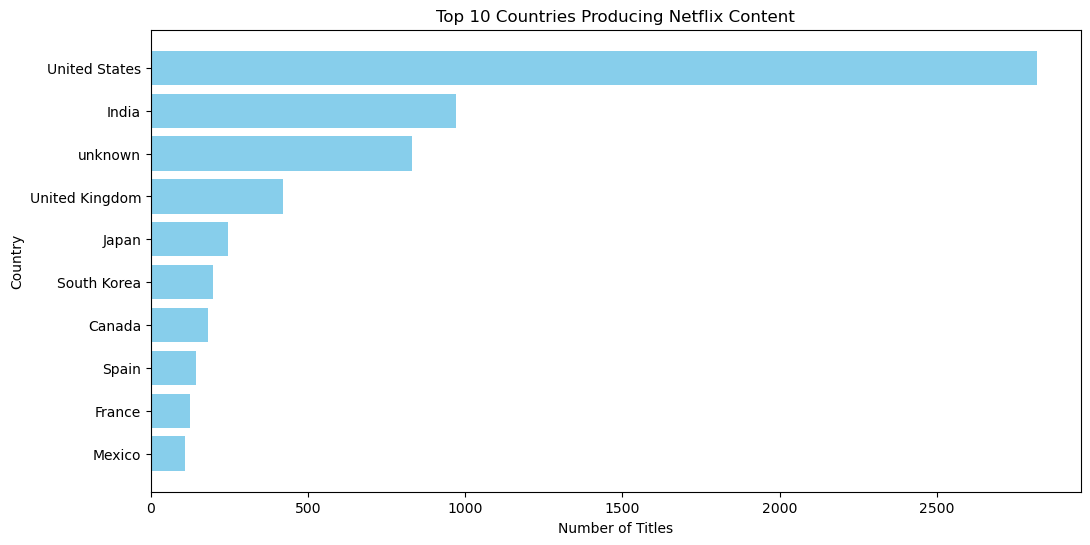

In [29]:
import matplotlib.pyplot as plt

# Top 10 countries producing Netflix content
plt.figure(figsize=(12,6))
plt.barh(top_countries.index, top_countries.values, color='skyblue')

plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.gca().invert_yaxis()  # Highest number on top
plt.show()

### Insight:
The United States produces the highest number of Netflix titles, followed by India and the United Kingdom. This suggests that Netflix relies on Hollywood content while expanding internationally to attract a global audience.


In [30]:
df['listed_in'].head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [33]:

all_genres = df['listed_in'].str.split(',').explode().str.strip()

top_genres = all_genres.value_counts().head(10)
top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

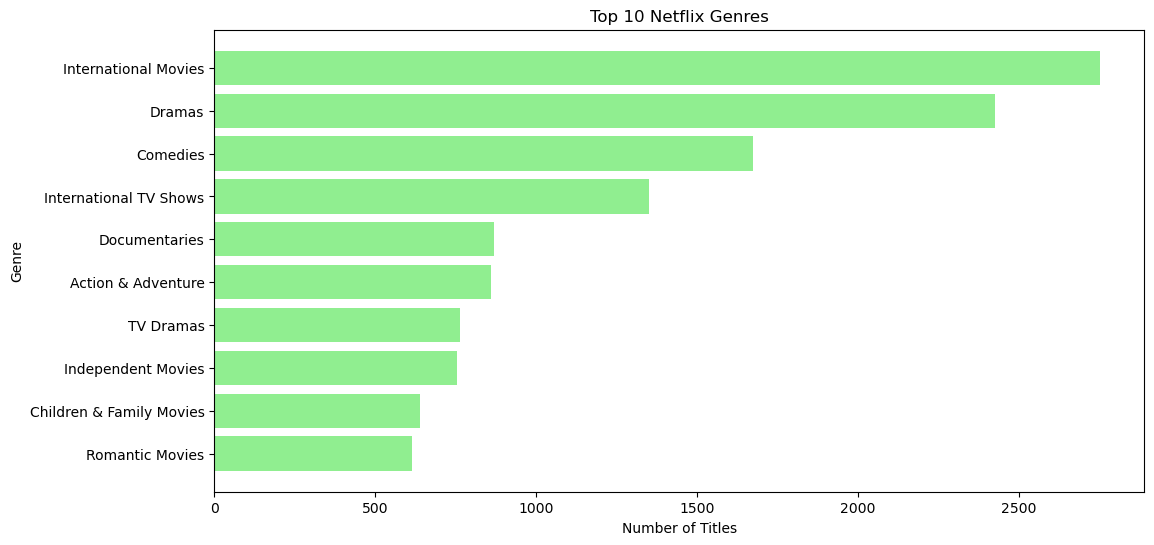

In [34]:
plt.figure(figsize=(12,6))
plt.barh(top_genres.index, top_genres.values, color='lightgreen')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Highest genre on top
plt.show()

### Insight:
Drama is the most common genre on Netflix, followed by International Movies and Comedies. This suggests that Netflix focuses on emotionally engaging content and global appeal to attract a wide audience.


In [36]:
df['release_year'].value_counts().head()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

In [38]:
titles_per_year = df['release_year'].value_counts().sort_index()
titles_per_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

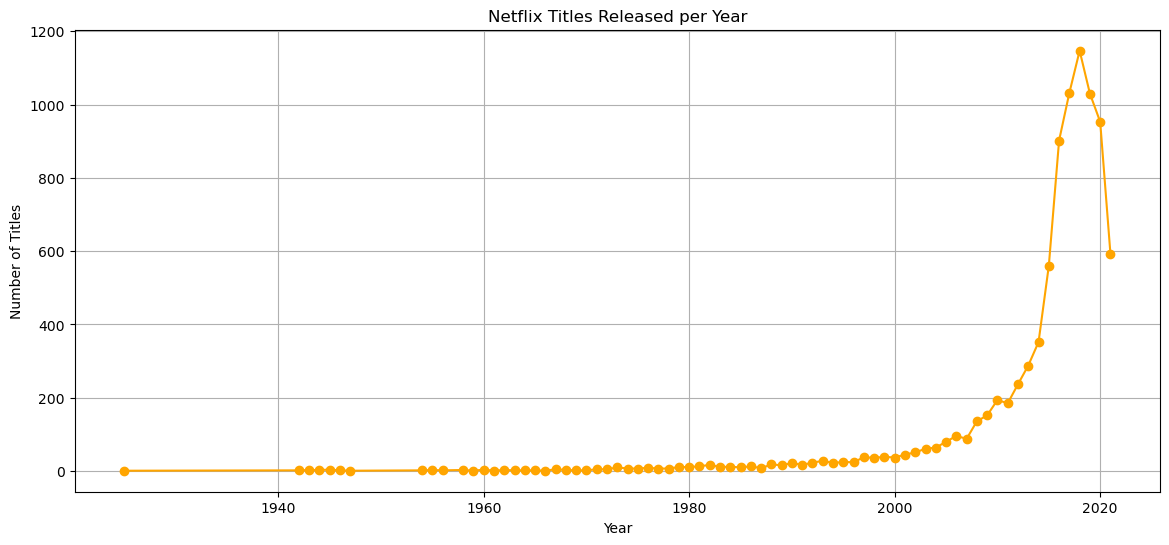

In [39]:
plt.figure(figsize=(14,6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='orange')
plt.title('Netflix Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### Insight:
Netflix content has grown significantly over the years, with a notable increase in titles released after 2015. This indicates rapid expansion of the platform’s library to attract more subscribers and stay competitive in the streaming market.


In [40]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [43]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

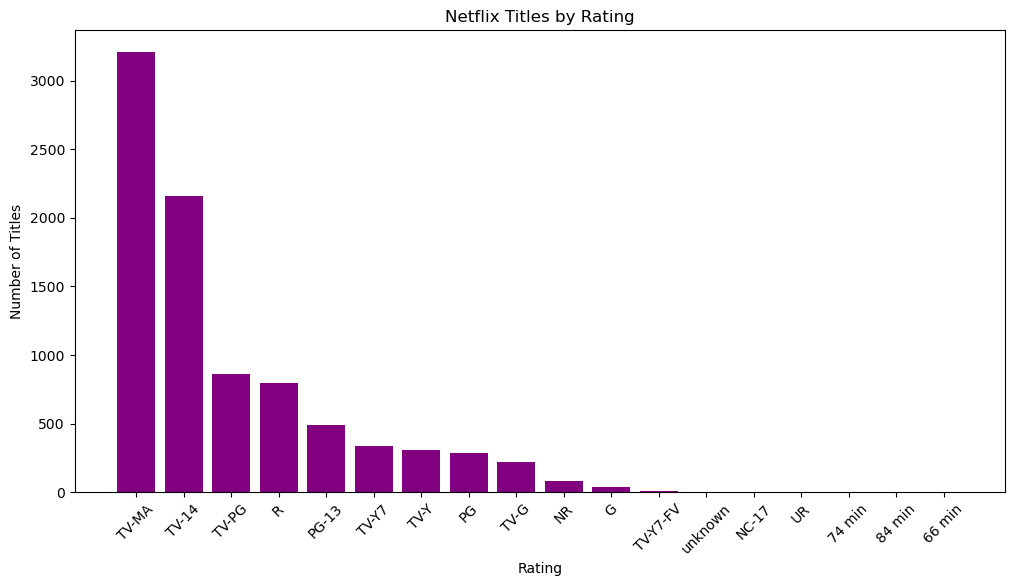

In [44]:
plt.figure(figsize=(12,6))
plt.bar(rating_counts.index, rating_counts.values, color='purple')
plt.title('Netflix Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Insight:
The majority of Netflix titles are rated TV-MA and TV-14, indicating a focus on mature and teen audiences. Fewer titles are aimed at children, suggesting that while family content exists, Netflix primarily targets older viewers.
